In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r'C:\Users\User\Desktop\Data analytics\Python Assignments\Superstore.xlsx')

In [3]:
df.shape

(65535, 21)

In [4]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,9/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2013-152156,9/11/2013,12/11/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2013-138688,13/6/2013,17/6/2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [5]:
df.count()

Row ID           65535
Order ID         65535
Order Date       65535
Ship Date        65535
Ship Mode        65535
Customer ID      65535
Customer Name    65535
Segment          65535
Country          65535
City             65535
State            65535
Postal Code      65478
Region           65535
Product ID       65535
Category         65535
Sub-Category     65535
Product Name     65535
Sales            65535
Quantity         65535
Discount         65535
Profit           65535
dtype: int64

In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      57
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [7]:
df['Postal Code'] = df['Postal Code'].fillna(0)

In [8]:
df.duplicated().sum()

55515

In [9]:
df = df.drop_duplicates()

In [10]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10020 entries, 0 to 19783
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         10020 non-null  int64  
 1   Order ID       10020 non-null  object 
 2   Order Date     10020 non-null  object 
 3   Ship Date      10020 non-null  object 
 4   Ship Mode      10020 non-null  object 
 5   Customer ID    10020 non-null  object 
 6   Customer Name  10020 non-null  object 
 7   Segment        10020 non-null  object 
 8   Country        10020 non-null  object 
 9   City           10020 non-null  object 
 10  State          10020 non-null  object 
 11  Postal Code    10020 non-null  float64
 12  Region         10020 non-null  object 
 13  Product ID     10020 non-null  object 
 14  Category       10020 non-null  object 
 15  Sub-Category   10020 non-null  object 
 16  Product Name   10020 non-null  object 
 17  Sales          10020 non-null  float64
 18  Quanti

In [12]:
# change datatypes of some columns
df['Postal Code'] = df['Postal Code'].astype(int)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst = True)

In [13]:
df[['Segment', 'Country', 'State', 'Region', 'Category']].value_counts().inplace=True

In [14]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000
mean,5000.028643,55120.997305,230.674595,3.791317,0.155897,28.919946
std,2886.729821,32093.877754,624.272020,2.227921,0.206310,234.257889
min,1.000000,0.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2500.750000,22980.000000,17.307500,2.000000,0.000000,1.734975
50%,4999.500000,55901.000000,54.816000,3.000000,0.200000,8.679950
75%,7501.250000,90008.000000,209.991500,5.000000,0.200000,29.520300
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<Axes: xlabel='Sales'>

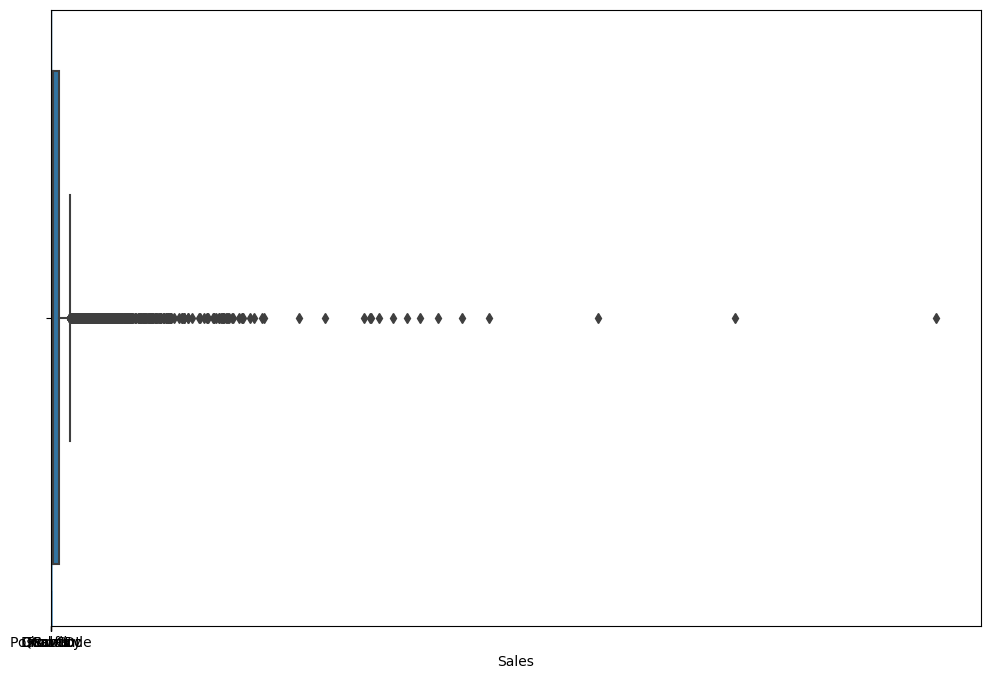

In [15]:
# Row ID not correct, there must be outliers in sales, and outliers in profit column too because there's a wide gap betweeen
# the third and fourth quartile
# Lets look through values in Sales and Profit column using boxplot
df.boxplot(figsize=(12,8))
sns.boxplot( x = df.Sales)

In [16]:
df.boxplot(figsize=(12,8))
sns.boxplot( x = df.Profit)

<Axes: xlabel='Profit'>

### from the above analysis, we can confirm that there are outliers in Sales and Profit values because there are lots of dots
### from the box graph but I don't know what to do about it

# Exploratory Data Analysis

## 1.  Sales forecast: The goal here is to predict if sales will continue to increase or decrease

In [17]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [18]:
# Here, we'll create new column titled Order Year from Order Date because we need to plot a chart on sales vs year
df['Order Year'] = df['Order Date'].dt.year.astype('str')

In [19]:
Sales_forecast = df.groupby('Order Year')['Sales'].sum().astype('int').reset_index()
Sales_forecast

,Order Year,Sales
0,2011,484327
1,2012,477132
2,2013,612683
3,2014,737216


In [20]:
Sales_forecast.plot.line(x='Order Year', y='Sales')

<Axes: xlabel='Order Year'>

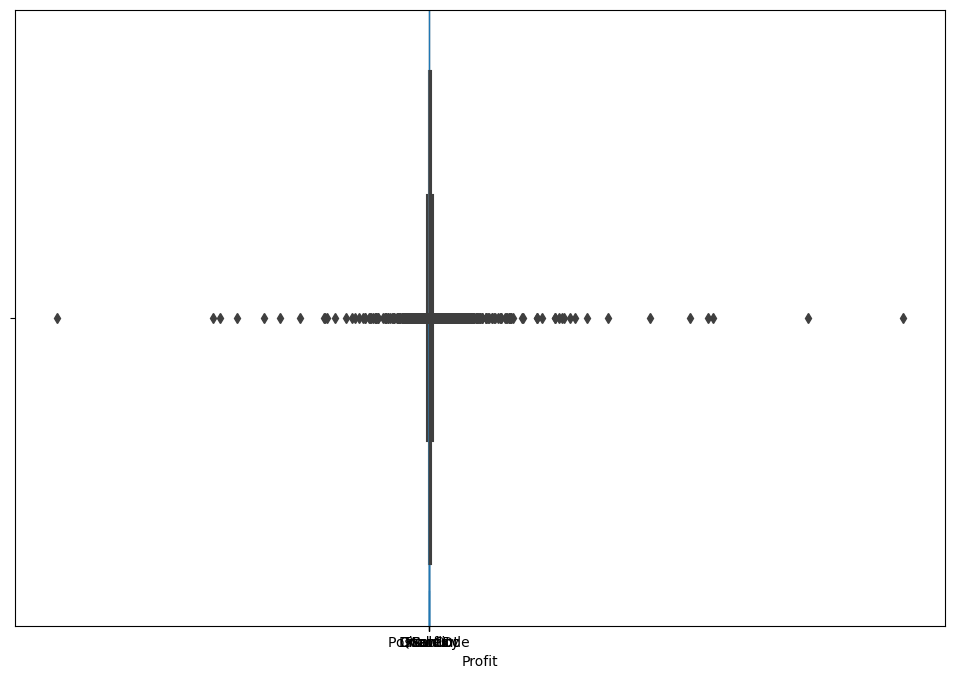

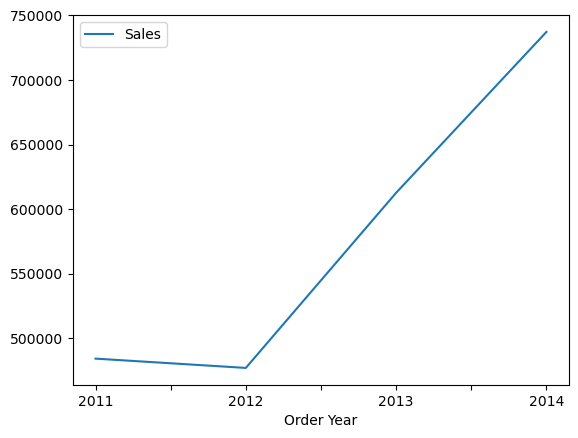

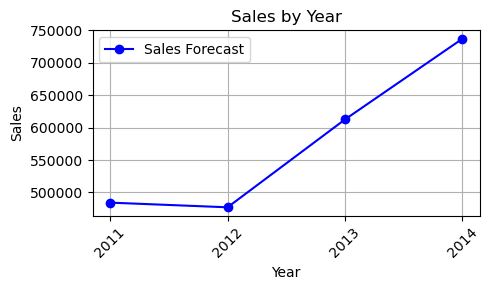

In [21]:
Order_Year = Sales_forecast['Order Year']
Sales = Sales_forecast['Sales']

# Create a line chart
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed
plt.plot(Order_Year, Sales, marker='o', linestyle='-', color='b', label='Sales Forecast')
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)

# Customize the chart
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()

# Display the chart
plt.show()

#### From the above chart, we can conclude that sales will continue to increase

## 2.  Customer segmentation
####  2.1  Customer Segment by Number of Sales

In [22]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2013
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2013
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2013
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2012
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2012


In [23]:
Segment_Country = df.groupby('Segment')['Sales'].count().reset_index()
Segment_Country

,Segment,Sales
0,Consumer,5205
1,Corporate,3028
2,Home Office,1787


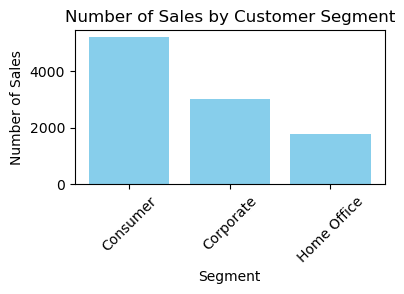

In [24]:
segments = Segment_Country['Segment']
sales_counts = Segment_Country['Sales']

# Create a bar chart
plt.figure(figsize=(4, 2))  # Adjust the figure size as needed
plt.bar(segments, sales_counts, color='skyblue')
plt.title('Number of Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Sales')

# Customize the chart
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the chart
plt.show()

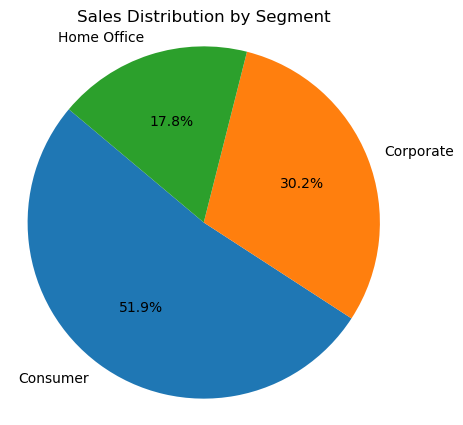

In [25]:

labels = Segment_Country['Segment']
sizes = Segment_Country['Sales']
total_sales = sizes.sum()  # Total sales count

# Calculate percentages
percentages = (sizes / total_sales) * 100

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Segment')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

#### The above shows that Consumers are major customers of the US Superstore

#### 2.2  Region with highest sales

In [26]:
Sales_Region = df.groupby('Region')['Sales'].count().reset_index().sort_values('Sales', ascending=False)
Sales_Region

,Region,Sales
3,West,3205
1,East,2864
0,Central,2327
2,South,1624


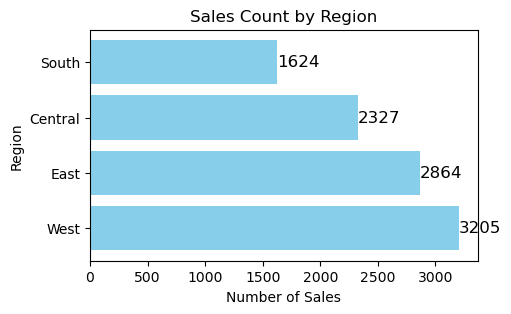

In [27]:
regions = Sales_Region['Region']
sales_counts = Sales_Region['Sales']

# Create a horizontal bar chart
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed
plt.barh(regions, sales_counts, color='skyblue')
plt.title('Sales Count by Region')
plt.xlabel('Number of Sales')
plt.ylabel('Region')

# Add values on the bars
for count, region in zip(sales_counts, regions):
    plt.text(count, region, str(count), va='center', fontsize=12)

# Customize the chart
plt.grid(axis='x', linestyle='--', alpha=0)

# Display the chart
plt.show()

#### West region of the United states contribute most to the number of Sales, followed by East, then Central, and finally South region

#### 2.3  Customer segment vs Product category: Here, we are determined to know Customer Segment and Product Category contribute to number of Sales

In [28]:
Segment_Cat = (df[['Segment', 'Category', 'Sales']].sort_values('Sales', ascending=True).groupby(['Segment', 'Category'])['Sales'].count().reset_index())
Segment_Cat

,Segment,Category,Sales
0,Consumer,Furniture,1114
1,Consumer,Office Supplies,3132
2,Consumer,Technology,959
3,Corporate,Furniture,647
4,Corporate,Office Supplies,1825
5,Corporate,Technology,556
6,Home Office,Furniture,362
7,Home Office,Office Supplies,1082
8,Home Office,Technology,343


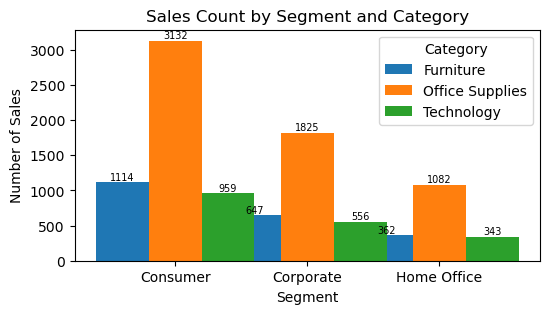

In [29]:
segments = Segment_Cat['Segment']
categories = Segment_Cat['Category']
sales_counts = Segment_Cat['Sales']

# Create a grouped bar chart with values on the bars
fig, ax = plt.subplots(figsize=(6, 3))

# Define the width of each bar and the position of x-axis labels
bar_width = 0.4
x = np.arange(len(segments.unique()))

# Create bars for each category and segment
for i, category in enumerate(categories.unique()):
    category_data = sales_counts[categories == category]
    ax.bar(x + (i * bar_width), category_data, width=bar_width, label=category)
    
    # Add values on the bars
    for xi, val in zip(x + (i * bar_width), category_data):
        ax.text(xi, val, str(val), ha='center', va='bottom', fontsize=7)

# Set x-axis labels and title
ax.set_xticks(x + (bar_width * (len(categories.unique()) - 1) / 2))
ax.set_xticklabels(segments.unique())
ax.set_xlabel('Segment')
ax.set_ylabel('Number of Sales')
ax.set_title('Sales Count by Segment and Category')

# Add a legend
ax.legend(title='Category', loc='upper right')

# Show the chart
plt.show()

#### From the above visual, we now know that Office Supplies has the largest share of number of sales, followed by Furniture, then, Technology across the 3 segments of customer

#### 2.4  Customer Segment vs Shipping mode: Here, we want to know what mode of shipping is popular amoung Customer segments

In [30]:
Segment_Ship = (df[['Segment', 'Ship Mode', 'Sales']].sort_values('Sales', ascending=True).groupby(['Segment', 'Ship Mode'])['Sales'].count().reset_index())
Segment_Ship

,Segment,Ship Mode,Sales
0,Consumer,First Class,770
1,Consumer,Same Day,317
2,Consumer,Second Class,1022
3,Consumer,Standard Class,3096
4,Corporate,First Class,485
5,Corporate,Same Day,114
6,Corporate,Second Class,610
7,Corporate,Standard Class,1819
8,Home Office,First Class,284
9,Home Office,Same Day,113


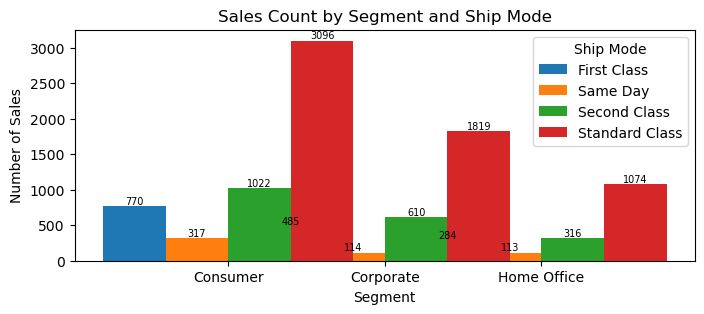

In [31]:
segments = Segment_Ship['Segment']
ship_modes = Segment_Ship['Ship Mode']
sales_counts = Segment_Ship['Sales']

# Create a grouped bar chart with values on the bars
fig, ax = plt.subplots(figsize=(8, 3))

# Define the width of each bar and the position of x-axis labels
bar_width = 0.4
x = np.arange(len(segments.unique()))

# Create bars for each ship mode and segment
for i, ship_mode in enumerate(ship_modes.unique()):
    ship_mode_data = sales_counts[ship_modes == ship_mode]
    ax.bar(x + (i * bar_width), ship_mode_data, width=bar_width, label=ship_mode)
    
    # Add values on the bars
    for xi, val in zip(x + (i * bar_width), ship_mode_data):
        ax.text(xi, val, str(val), ha='center', va='bottom', fontsize=7)

# Set x-axis labels and title
ax.set_xticks(x + (bar_width * (len(ship_modes.unique()) - 1) / 2))
ax.set_xticklabels(segments.unique())
ax.set_xlabel('Segment')
ax.set_ylabel('Number of Sales')
ax.set_title('Sales Count by Segment and Ship Mode')

# Add a legend
ax.legend(title='Ship Mode', loc='upper right')

# Show the chart
plt.show()

#### Only Consumer of Customer segment uses First Class, other segments dont. Also, majority of orders use standard class ship mode. Lastly, same day delivery is rearly used by the Consumer, Corporate, and Home Office consumer segments

### The buying behavior, demographics, and purchasing history of US superstore read that consumers make up the majority of the US Superstore's clientele. The West, East, Central, and South areas of the United States have the most sales, in that order. Furthermore, Office supplies are the most popular product category in terms of sales, followed by furniture and technology for all client groups. Only the Consumer category uses First Class delivery, with the bulk of purchases in all other categories using standard class shipping. Lastly, Consumer, Corporate, and Home Office consumer categories seldom employ same-day delivery.

## 3.  Marketing Strategy:
* Target marketing efforts on the West area of the US, which has the largest sales. Increase sales in this area using regional specials, collaborations, or localised advertising. Monitor market rivals, particularly in the West too, and adjust your plan to remain ahead. Price matching, superior customer service, or unique products are examples.
* Promote bundle packages, unique discounts, and special promotions to boost sales of.
* Offer free or cheap shipping for big orders in these sectors to promote greater purchases.
* Identify strategies to enhance attractiveness for same day delivery. This might include speedier processing, larger delivery locations, or lower service rates.
* Customer input should be ongoing to understand shifting demands and preferences. Change and enhance the marketing plan using this input.

## 4.  Profit Analysis

#### 4.1   Products Category with highest profit

In [32]:
Product_Category_Profit = df.groupby('Category')['Profit'].sum().round().reset_index()
Product_Category_Profit

,Category,Profit
0,Furniture,19643.0
1,Office Supplies,124078.0
2,Technology,146056.0


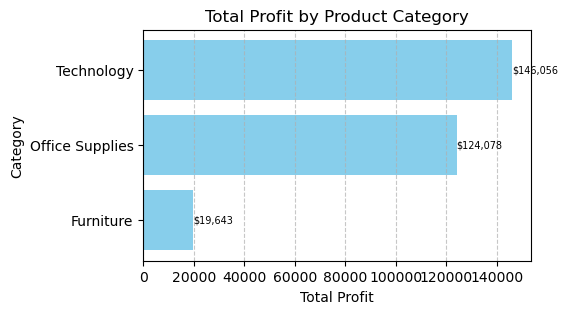

In [33]:
categories = Product_Category_Profit['Category']
profits = Product_Category_Profit['Profit']

# Create a horizontal bar chart
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed
plt.barh(categories, profits, color='skyblue')
plt.title('Total Profit by Product Category')
plt.xlabel('Total Profit')
plt.ylabel('Category')

# Add values on the bars
for profit, category in zip(profits, categories):
    plt.text(profit, category, f"${int(profit):,}", va='center', fontsize=7)

# Customize the chart
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the chart
plt.show()

#### Okay, It was established that a product category,Technology, contribute the least to the number of sales. However, it has further been established that Technology generates profit the most.

#### 4.2  Regions' contribution to profit

In [34]:
Region_Profit = df.groupby('Region')['Profit'].sum().round().reset_index().sort_values('Profit')
Region_Profit

,Region,Profit
0,Central,39827.0
2,South,47277.0
1,East,94005.0
3,West,108669.0


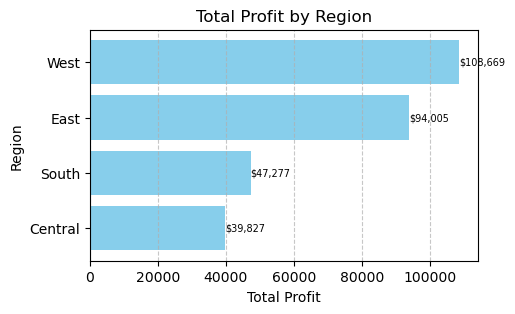

In [35]:
regions = Region_Profit['Region']
profits = Region_Profit['Profit']

# Create a horizontal bar chart
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed
plt.barh(regions, profits, color='skyblue')
plt.title('Total Profit by Region')
plt.xlabel('Total Profit')
plt.ylabel('Region')

# Add values on the bars
for profit, region in zip(profits, regions):
    plt.text(profit, region, f"${int(profit):,}", va='center', fontsize=7)

# Customize the chart
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the chart
plt.show()

#### Also, we concluded that West and East are top actors in number of sales. They are also regions contributing the most to profit

#### 4.3  Customer segment's contribution to profit

In [36]:
Segment_Profit = df.groupby('Segment')['Profit'].sum().round().reset_index().sort_values('Profit')
Segment_Profit

,Segment,Profit
2,Home Office,61261.0
1,Corporate,93825.0
0,Consumer,134692.0


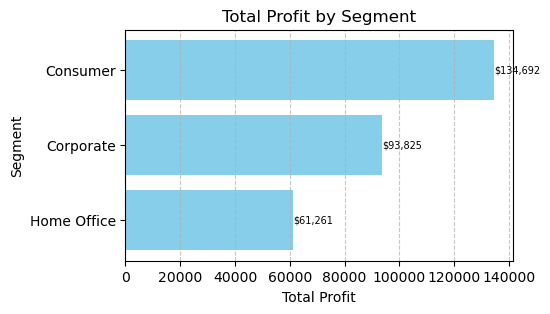

In [37]:
segments = Segment_Profit['Segment']
profits = Segment_Profit['Profit']

# Create a horizontal bar chart
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed
plt.barh(segments, profits, color='skyblue')
plt.title('Total Profit by Segment')
plt.xlabel('Total Profit')
plt.ylabel('Segment')

# Add values on the bars
for profit, segment in zip(profits, segments):
    plt.text(profit, segment, f"${int(profit):,}", va='center', fontsize=7)

# Customize the chart
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the chart
plt.show()

#### Consumer segment led other segments in profit generation just like it did in sales generation

#### In summary, most profitable product category is Technology. Most profitable region and customer segment are West and Consumers respectively. Therefore US superstore should use this information to its advantage.

## 5.  Inventory Management

#### 5.1    Sales number by month

In [48]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2013,November
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2013,November
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2013,June
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2012,October
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2012,October


In [39]:
# Extract month
df['Order Month'] = df['Order Date'].dt.month

In [40]:
# map month number to month name
mapmonth= {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
df['Order Month'] = df['Order Month'].map(mapmonth)

In [41]:
# Monthly inventory management
# Average sales in each month
Mon_in_mgt_cat = df.groupby(['Order Month', 'Sub-Category'])['Sales'].mean().round().reset_index()
Mon_in_mgt_cat

,Order Month,Sub-Category,Sales
0,April,Accessories,170.0
1,April,Appliances,179.0
2,April,Art,34.0
3,April,Binders,130.0
4,April,Bookcases,328.0
...,...,...,...
198,September,Paper,54.0
199,September,Phones,389.0
200,September,Storage,232.0
201,September,Supplies,248.0


In [42]:
Mon_in_mgt_cat.value_counts()

Order Month  Sub-Category  Sales 
April        Accessories   170.0     1
May          Bookcases     484.0     1
March        Machines      3505.0    1
             Paper         65.0      1
             Phones        399.0     1
                                    ..
January      Binders       197.0     1
             Bookcases     422.0     1
             Chairs        705.0     1
             Copiers       1980.0    1
September    Tables        577.0     1
Length: 203, dtype: int64

In [43]:
Mon_in_mgt = df.groupby('Order Month')['Sales'].mean().round().reset_index()
Mon_in_mgt

,Order Month,Sales
0,April,216.0
1,August,225.0
2,December,234.0
3,February,199.0
4,January,247.0
5,July,212.0
6,June,207.0
7,March,293.0
8,May,208.0
9,November,243.0


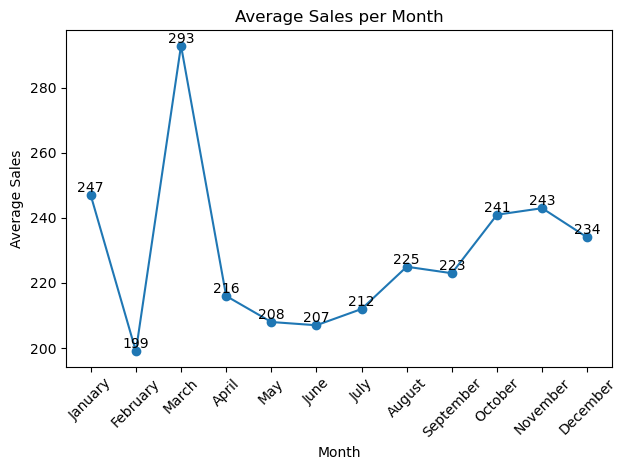

In [50]:
# Define the desired order of months
desired_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Map month numbers to month names and order them
# Mon_in_mgt['Order Month'] = Mon_in_mgt['Order Month'].map(mapmonth)
Mon_in_mgt['Order Month'] = pd.Categorical(Mon_in_mgt['Order Month'], categories=desired_order, ordered=True)

# Sort the DataFrame by the desired order
Mon_in_mgt = Mon_in_mgt.sort_values('Order Month')

# Create a line chart
plt.plot(Mon_in_mgt['Order Month'], Mon_in_mgt['Sales'], marker='o', linestyle='-')

# Add rounded data values to the plot
for i, sales in enumerate(Mon_in_mgt['Sales']):
    plt.text(i, sales, f'{sales:.0f}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales per Month')

# Rotate x-axis labels for readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [90]:
Mon_in_mgt_all_year= df.groupby('Order Month')['Sales'].count().round().reset_index()
Mon_in_mgt_all_year

,Order Month,Sales
0,April,664
1,August,710
2,December,1424
3,February,303
4,January,395
5,July,709
6,June,710
7,March,683
8,May,750
9,November,1468


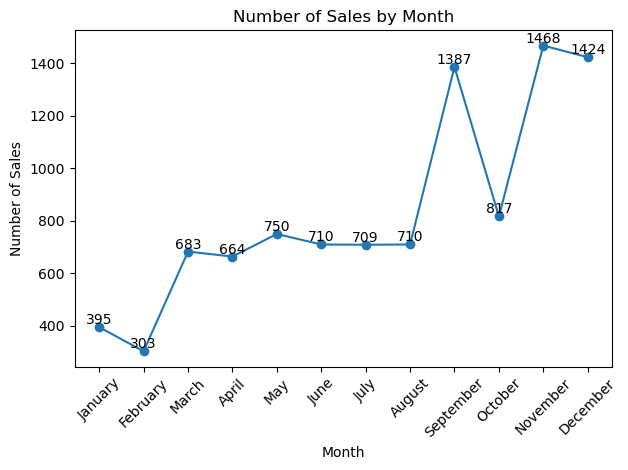

In [91]:
# Define the desired order of months
desired_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Map month numbers to month names and order them
# Mon_in_mgt_all_year['Order Month'] = Mon_in_mgt_all_year['Order Month'].map(mapmonth)
Mon_in_mgt_all_year['Order Month'] = pd.Categorical(Mon_in_mgt_all_year['Order Month'], categories=desired_order, ordered=True)

# Sort the DataFrame by the desired order
Mon_in_mgt_all_year = Mon_in_mgt_all_year.sort_values('Order Month')

# Create a line chart
plt.plot(Mon_in_mgt_all_year['Order Month'], Mon_in_mgt_all_year['Sales'], marker='o', linestyle='-')

# Add rounded data values to the plot
for i, sales in enumerate(Mon_in_mgt_all_year['Sales']):
    plt.text(i, sales, f'{sales:.0f}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Number of Sales by Month')

# Rotate x-axis labels for readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

#### It is official, total number of sales increase towards the end of each year especially November and December

#### 5.2   Average product category sales in each month

In [52]:
Mon_inpro_mgt = df.groupby(['Order Month','Category'])['Sales'].count().reset_index()
Mon_inpro_mgt

,Order Month,Category,Sales
0,April,Furniture,137
1,April,Office Supplies,411
2,April,Technology,116
3,August,Furniture,126
4,August,Office Supplies,450
5,August,Technology,134
6,December,Furniture,333
7,December,Office Supplies,833
8,December,Technology,258
9,February,Furniture,65


In [ ]:

# Create a list of unique months in your data
unique_months = Mon_inpro_mgt['Order Month'].unique()

# Create a colormap with a different color for each unique month
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_months)))

# Create a dictionary to map months to colors
month_colors = dict(zip(unique_months, colors))

# Create a horizontal bar chart with different colors for each month
plt.figure(figsize=(7, 15))  # Adjust the figure size as needed
bars = plt.barh(Mon_inpro_mgt['Order Month Name'] + ' - ' + Mon_inpro_mgt['Category'], Mon_inpro_mgt['Sales'],
                color=[month_colors[month] for month in Mon_inpro_mgt['Order Month Name']])

# Set axis labels and title
plt.xlabel('Number of Sales')
plt.ylabel('Month - Category')
plt.title('Number of Sales by Month and Product Category')

# Move the value labels to the front
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y(), str(int(width)), fontsize=7, va='center', color='black')

# Show the plot
plt.grid(axis='x')  # Add grid lines only to the x-axis
plt.tight_layout()  # Optional to make sure labels fit within the figure
plt.show()

## 6.  Supply chain efficiency

In [53]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2013,November
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2013,November
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2013,June
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2012,October
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2012,October


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10020 entries, 0 to 19783
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         10020 non-null  int64         
 1   Order ID       10020 non-null  object        
 2   Order Date     10020 non-null  datetime64[ns]
 3   Ship Date      10020 non-null  datetime64[ns]
 4   Ship Mode      10020 non-null  object        
 5   Customer ID    10020 non-null  object        
 6   Customer Name  10020 non-null  object        
 7   Segment        10020 non-null  object        
 8   Country        10020 non-null  object        
 9   City           10020 non-null  object        
 10  State          10020 non-null  object        
 11  Postal Code    10020 non-null  int32         
 12  Region         10020 non-null  object        
 13  Product ID     10020 non-null  object        
 14  Category       10020 non-null  object        
 15  Sub-Category   1002

In [55]:
from datetime import datetime
# Calculate the time difference between 'ship date' and 'order date'
df['Time_to_ship'] = df['Ship Date'] - df['Order Date']

# Display the DataFrame with the time difference
df['Time_to_ship'] = df['Time_to_ship'].astype('str')
df['Time_to_ship'] = pd.to_numeric(df['Time_to_ship'].astype('str').str.replace(' days', ''))

In [56]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Time_to_ship
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2013,November,3
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2013,November,3
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2013,June,4
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2012,October,7
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2012,October,7


In [74]:
# number of occurence of various time_to_ship
df['Time_to_ship'].value_counts().reset_index()

,index,Time_to_ship
0,4,2786
1,5,2179
2,2,1334
3,6,1203
4,3,1008
5,7,622
6,0,520
7,1,368


In [58]:
# Average time to ship based on shipping mode
Ship_mode_time = df.groupby('Ship Mode')['Time_to_ship'].mean().round().reset_index()
Ship_mode_time

,Ship Mode,Time_to_ship
0,First Class,2.0
1,Same Day,0.0
2,Second Class,3.0
3,Standard Class,5.0


In [59]:
# filter out acceptable time_to_ship (0-5)
Not_allowed = df.loc[df['Time_to_ship'] > 5]
Not_allowed

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Time_to_ship
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2012,October,7
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2012,October,7
16,17,CA-2011-105893,2011-11-11,2011-11-18,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,...,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.8800,6,0.00,13.3176,2011,November,7
53,54,CA-2013-105816,2013-12-12,2013-12-18,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,...,Office Supplies,Fasteners,Advantus Push Pins,15.2600,7,0.00,6.2566,2013,December,6
54,55,CA-2013-105816,2013-12-12,2013-12-18,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,...,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.9500,5,0.00,298.6855,2013,December,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,9985,CA-2012-100251,2012-05-17,2012-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,Office Supplies,Labels,Self-Adhesive Removable Labels,31.5000,10,0.00,15.1200,2012,May,6
9985,9986,CA-2012-100251,2012-05-17,2012-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.6000,4,0.00,16.1240,2012,May,6
10883,890,CA-2014-132934,2014-06-21,2014-06-27,Standard Class,JE-15475,Jeremy Ellison,Consumer,United States,New Rochelle,...,Technology,Accessories,Anker Ultrathin Bluetooth Wireless Keyboard Al...,149.9500,5,0.00,14.9950,2014,June,6
13584,3591,CA-2014-146535,2014-11-25,2014-12-01,Standard Class,FM-14290,Frank Merwin,Home Office,United States,Richmond,...,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1443.9600,12,0.00,375.4296,2014,November,6


In [71]:
# Discover trends in each column
a = Not_allowed.groupby('Ship Mode')['Time_to_ship'].count().round().reset_index()
a
Not_allowed['Ship Mode'].value_counts()
#Not_allowed['Category'].value_counts()

,Ship Mode,Time_to_ship
0,Standard Class,1825


##### From the last analysis, we discovered that for late time_to_ship, the shipping mode were all 'Standard shipping' and the product category shows that a huge chunk of late time_to_ship products were 'Office supplies'

In [63]:
Ship_mode_cat = df.groupby('Sub-Category')['Time_to_ship'].mean().reset_index().sort_values('Time_to_ship', ascending=False)
Ship_mode_cat

,Sub-Category,Time_to_ship
2,Art,4.052698
3,Binders,4.022981
15,Supplies,4.015789
7,Envelopes,4.015686
10,Labels,4.005495
13,Phones,4.003371
1,Appliances,3.989293
8,Fasteners,3.976959
14,Storage,3.974239
9,Furnishings,3.961338


##### The above shows the average time_to_ship of various Product sub-categories

In [64]:
# time_to_ship vs region
Ship_mode_city = df.groupby('Region')['Time_to_ship'].mean().reset_index().sort_values('Time_to_ship', ascending=False)
Ship_mode_city

,Region,Time_to_ship
0,Central,4.057585
2,South,3.963670
3,West,3.928861
1,East,3.910615


#### To summarize, the time_to_ship for standard shipping needs to be worked on so that the duration does not exceed 5 days

##  7.   Customer Retention
* Consider implementing a loyalty programme that rewards repeat purchases. Offer points, discounts, or exclusive items or services to keep consumers coming back.

* Use data analytics to deliver personalised product suggestions based on consumer purchasing history. This improves shopping and encourages repeat purchases.

* Use email marketing to send personalised and targeted emails to your consumer base. To engage consumers, provide product updates, unique deals, and relevant material.

* Customer input Loop: Collect customer input on their retail experience. Address complaints and utilise comments to enhance services. This tells consumers their views matter.

* Deliver great customer service that exceeds expectations. Fast service, problem-solving, and friendliness may boost client loyalty.

* Offer unique discounts or promotions to current consumers. Make returning customers feel unique and valued.

* To surprise and delight consumers, consider offering complimentary products or personalised thank-you notes. This impresses and builds loyalty.

* Make returns and refunds as easy as possible. Knowing they can readily fix problems makes customers return.

* Build a feeling of camaraderie among your consumers. Establish a forum or social media group where people may discuss your goods and services and provide recommendations.

* Quality Assurance: Maintain product and service standards. Excellent goods and services will automatically attract repeat customers.

* Consider offering subscription services for regularly purchased items. This ensures recurring business.

* Incorporate social responsibility programmes that connect with your target demographic. Customers with similar values are more loyal.

* Target inactive or lapsed clients with re-engagement initiatives to get them back into the fold. Provide incentives to encourage repeat purchases.

* Segmented Communication: Categorize customers by preferences and behaviour. Make your messages and offerings more relevant and engaging by segmenting.

* Offer awards or discounts for successful referrals to encourage pleased customers to recommend friends and family.

* Maintain consistent branding and message across all mediums. This strengthens brand identification and client trust.


* **These above techniques will promote client loyalty, minimise churn, and boost repeat business, resulting in greater customer retention and long-term success.


## 8.   Cost Reduction

#### 8.1   Profit generated from each Product category

In [85]:
Product_profit = df.groupby('Category')['Profit'].sum().round().reset_index()
Product_profit

,Category,Profit
0,Furniture,19643.0
1,Office Supplies,124078.0
2,Technology,146056.0


<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

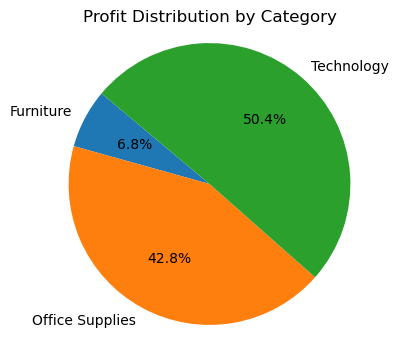

In [86]:
# Create a pie chart
plt.figure(figsize=(4, 4))  # Adjust the figure size if needed
plt.pie(Product_profit['Profit'], labels=Product_profit['Category'], autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Profit Distribution by Category')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

#### 8.2    Product sub-category with their contribution to profit

In [88]:
Product_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values('Profit', ascending=True)
Product_profit

,Sub-Category,Profit
16,Tables,-17725.4811
4,Bookcases,-2459.4290
15,Supplies,-1189.0995
8,Fasteners,949.5182
11,Machines,3384.7569
10,Labels,5546.2540
2,Art,6530.5206
7,Envelopes,6965.1355
9,Furnishings,13059.1436
1,Appliances,18290.0286


<Figure size 500x800 with 0 Axes>

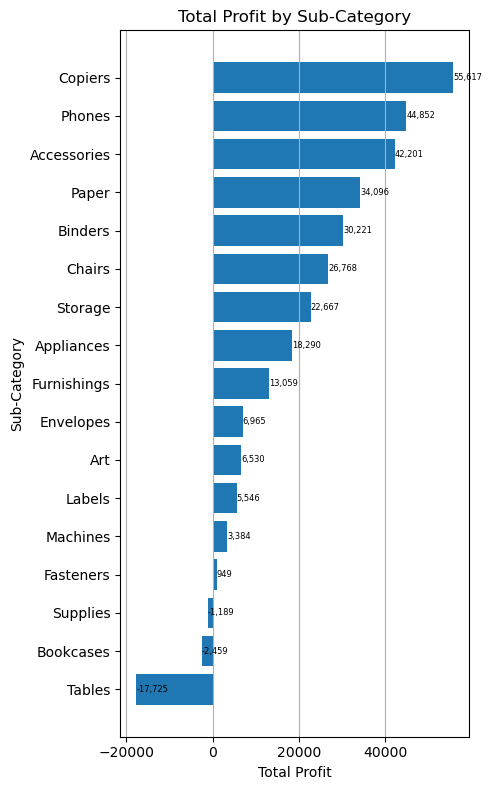

In [89]:
# Create a horizontal bar chart
plt.figure(figsize=(5, 8))  # Adjust the figure size as needed
bars = plt.barh(Product_profit['Sub-Category'], Product_profit['Profit'])

# Set axis labels and title
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.title('Total Profit by Sub-Category')

# Display the values in front of the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width):,}', fontsize=6, va='center')

# Show the plot
plt.grid(axis='x')  # Add grid lines only to the x-axis
plt.tight_layout()  # Optional to make sure labels fit within the figure
plt.show()

#### In conclusion, the product sub-categories with high profits are areas where cost reductions can be made without sacrificing product quality and customers' satisfaction.